# 1. Loading the Dataset

In [433]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [434]:
diabetes = load_diabetes()

In [435]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [436]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [437]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [440]:
features = diabetes['feature_names']
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [441]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

# 2. Splitting the Dataset

In [442]:
x_train,x_test,y_train,y_test = train_test_split(diabetes['data'],diabetes['target'],random_state = 2306)

In [443]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


# 3. Training and Testing R-square for Lasso Model

In [444]:
lasso = Lasso().fit(x_train,y_train)
lasso.score(x_train,y_train)

0.3667534691832586

In [445]:
lasso.score(x_test,y_test)

0.3138166630160344

In [446]:
coeff = np.sum(lasso.coef_!= 0)
print(coeff)

2


In [447]:
importance = np.abs(lasso.coef_)
print(importance)

[  0.           0.         359.36306991   0.           0.
   0.           0.           0.         322.58982167   0.        ]


We can see that there are only 3 features which have coeff greater than 0 and we do not require the features whose absolute values is 0

In [448]:
np.array(features)[importance > 0]

array(['bmi', 's5'], dtype='<U3')

We can see that with default parameters, the training and test R-square value are 0.36 and 0.31 respectively which is pretty bad. We are underfitting, 2 out of the 10 features are not enough. The 2 features are 'bmi' and 's5'.

# 4. Loading the Original Diabetes Dataset

In [449]:
X = np.genfromtxt("diabetes.data",delimiter = "\t",usecols = np.arange(10))
feat = np.genfromtxt("diabetes.data",delimiter = "\t",max_rows = 1, dtype = "str")
f = feat[0:len(feat)-1]
print(f)
X = X[~np.isnan(X).all(axis=1)]
X[:]

['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6']


array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]])

In [450]:
Y = np.genfromtxt("diabetes.data",delimiter = "\t", usecols = 10)
Y = Y[~np.isnan(Y).all(axis=0):]

<ipython-input-450-464e26351f1f>:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  Y = Y[~np.isnan(Y).all(axis=0):]


In [451]:
print(Y.shape)

(442,)


In [452]:
print(X.shape)

(442, 10)


# 5. Splitting the Original Dataset

In [453]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 2306)

In [454]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


# 6. Training and Test R-square for the Original Dataset

In [455]:
lasso = Lasso().fit(X_train,Y_train)
lasso.score(X_train,Y_train)

0.5231775960042604

In [456]:
lasso.score(X_test,Y_test)

0.4667853400222106

In [457]:
coefficients = np.sum(lasso.coef_ != 0)
print(coefficients)

8


In [458]:
imp = np.abs(lasso.coef_)
print(imp)

[ 0.         18.93374469  5.6658495   0.95496723  0.          0.20371447
  1.09760468  1.93272914 37.94665478  0.34752138]


All the features have coefficients greater than 0 in this model which can be seen above.

In [459]:
np.array(f)[imp > 0]

array(['SEX', 'BMI', 'BP', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='<U3')

With the default parameters, the training and test R-square values are 0.52 and 0.46 respectively. It is better as compared to the load_diabetes dataset. This model uses 8 features whereas the previous model used only 2 features out of 10. The features that this model uses are 'SEX', 'BMI', 'BP', 'S2', 'S3', 'S4', 'S5', 'S6'.

# 7. Preprocessing the Training and Test Sets

In [460]:
scaler = StandardScaler()

In [461]:
X_train_scaled = scaler.fit_transform(X_train)

In [462]:
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(331, 10)
[ 19.       1.      18.      62.     110.      41.6     22.       2.
   3.2581  60.    ]
[ 79.      2.     42.2   131.    301.    215.     97.      8.28    6.107
 124.   ]
[-2.28309161 -0.93844649 -1.85024439 -2.40405322 -2.3210313  -2.44594113
 -2.24848004 -1.5732834  -2.63456271 -2.77662861]
[2.39136194 1.06559086 3.6253634  2.76083995 3.41831707 3.42550833
 3.73581554 3.41444344 2.90002684 2.88513869]


# 8. Lasso Model for the Preprocessed training and test sets

In [463]:
lasso10 = Lasso().fit(X_train_scaled,Y_train)
lasso10.score(X_train_scaled,Y_train)

0.5251848166155568

In [464]:
scaler.fit(X_test)

StandardScaler()

In [465]:
X_test_scaled = scaler.transform(X_test)

In [466]:
lasso11 = Lasso().fit(X_test_scaled,Y_test)
lasso11.score(X_test_scaled,Y_test)

0.47999698197258023

In [467]:
coe = np.sum(lasso10.coef_ != 0)
print(coefficients)

8


In [468]:
imp = np.abs(lasso10.coef_)
print(imp)

[ 0.         10.0059514  23.9843532  11.81780242  5.9572764   0.
 10.90924013  1.7773559  24.72764484  2.78357426]


In [469]:
np.array(f)[imp > 0]

array(['SEX', 'BMI', 'BP', 'S1', 'S3', 'S4', 'S5', 'S6'], dtype='<U3')

These results are much closer to the original dataset than the load_diabetes() dataset. This is because Lasso generally puts constraints on the coefficients associated to each variable but it also depends on the magnitude of the variable. Hence it is necceasary to center or standardize the variables. Thus, on standarization it means there is no longer an intercept. Scaling also does not have any effect on the p-value so the R-square value comes near to the original dataset.Hence, the R-square value comes closer to item-6 than item-3 This model uses 8 features out of 10 and they are 'SEX', 'BMI', 'BP', 'S1', 'S3', 'S4', 'S5', 'S6'.

# 9. Plotting Test R-square Vs Number of features Used

In [470]:
lasso1 = Lasso(alpha=0.01, max_iter=100000)
lasso1.fit(X_train_scaled,Y_train)
lasso1.score(X_train_scaled,Y_train)

0.5307829296299315

In [471]:
t1 = lasso1.score(X_test_scaled,Y_test)

In [472]:
c1 = np.sum(lasso1.coef_ != 0)
print(c1)

10


In [473]:
lasso01 = Lasso(alpha = 0.001,max_iter=100000).fit(X_train_scaled,Y_train)
lasso01.score(X_train_scaled,Y_train)

0.5307907783631967

In [474]:
t2 = lasso01.score(X_test_scaled,Y_test)

In [475]:
c2 = np.sum(lasso01.coef_ != 0)
print(c2)

10


In [476]:
lasso001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled,Y_train)
lasso001.score(X_train_scaled,Y_train)

0.5307908568804314

In [477]:
t3 = lasso001.score(X_test_scaled,Y_test)

In [478]:
c3 = np.sum(lasso001.coef_ != 0)
print(c3)

10


In [479]:
lasso0001 = Lasso(alpha=0.1, max_iter=100000).fit(X_train_scaled,Y_train)
lasso0001.score(X_train_scaled,Y_train)

0.5301117377243493

In [480]:
t4 = lasso0001.score(X_test_scaled,Y_test)

In [481]:
c4 = np.sum(lasso0001.coef_ != 0)
print(c4)

9


In [482]:
lasso00001 = Lasso(alpha=0.2, max_iter=100000).fit(X_train_scaled,Y_train)
lasso00001.score(X_train_scaled,Y_train)

0.529357188094686

In [483]:
t5 = lasso00001.score(X_test_scaled,Y_test)

In [484]:
c5 = np.sum(lasso00001.coef_ != 0)
print(c5)

9


In [485]:
lasso000001 = Lasso(alpha=0.3, max_iter=10000000).fit(X_train_scaled,Y_train)
lasso000001.score(X_train_scaled,Y_train)

0.5275888205172957

In [486]:
t6 = lasso000001.score(X_test_scaled,Y_test)

In [487]:
c6 = np.sum(lasso000001.coef_ != 0)
print(c6)

9


In [488]:
lasso0000001 = Lasso(alpha=1.0, max_iter=100000).fit(X_train_scaled,Y_train)
lasso0000001.score(X_train_scaled,Y_train)

0.5251848166155568

In [489]:
t7 = lasso0000001.score(X_test_scaled,Y_test)
print(t7)

0.43457081201050496


In [490]:
c7 = np.sum(lasso0000001.coef_ != 0)
print(c7)

8


In [491]:
lasso00000001 = Lasso(alpha=0.7, max_iter=100000).fit(X_train_scaled,Y_train)
lasso00000001.score(X_train_scaled,Y_train)

0.5263089396119174

In [492]:
t8 = lasso00000001.score(X_test_scaled,Y_test)
print(t8)

0.43491066275317636


In [493]:
c8 = np.sum(lasso00000001.coef_ != 0)
print(c8)

8


In [494]:
lasso000000001 = Lasso(alpha=0.8, max_iter=100000).fit(X_train_scaled,Y_train)
lasso000000001.score(X_train_scaled,Y_train)

0.5259785826623882

In [495]:
t9 = lasso000000001.score(X_test_scaled,Y_test)
print(t9)

0.4348296455533287


In [496]:
c9 = np.sum(lasso0000001.coef_ != 0)
print(c9)

8


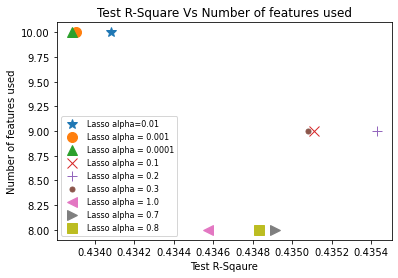

In [497]:
plt.plot(t1,c1,'*',label = "Lasso alpha=0.01",markersize = 10)
plt.plot(t2,c2,'o',label = "Lasso alpha = 0.001",markersize = 10)
plt.plot(t3,c3,'^',label = "Lasso alpha = 0.0001",markersize = 10)
plt.plot(t4,c4,'x',label = "Lasso alpha = 0.1",markersize = 10)
plt.plot(t5,c5,'+',label = "Lasso alpha = 0.2",markersize = 10)
plt.plot(t6,c6,'.',label = "Lasso alpha = 0.3",markersize = 10)
plt.plot(t7,c7,'<',label = "Lasso alpha = 1.0",markersize = 10)
plt.plot(t8,c8,'>',label = "Lasso alpha = 0.7",markersize = 10)
plt.plot(t9,c9,'s',label = "Lasso alpha = 0.8",markersize = 10)
plt.xlabel("Test R-Sqaure")
plt.ylabel("Number of features used")
plt.title("Test R-Square Vs Number of features used")
plt.legend(loc = "lower left",prop={'size':8})

I would choose the point with alpha = 0.01 as it uses the 10 features for the model and it is not underfitting as well. The test R-square value is decent as well.

# 10. Choosing regularization parameter using cross-validation

In [498]:
parameter_grid = {'alpha': [0.001, 0.01,0.0001, 0.1,1,0.2]}

In [499]:
grid_search = GridSearchCV(Lasso(), parameter_grid, cv = 5)

In [500]:
l = grid_search.fit(X_train_scaled,Y_train)
print(l)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.0001, 0.1, 1, 0.2]})


In [501]:
l.score(X_train_scaled,Y_train)

0.5307908568804314

In [502]:
l.score(X_test_scaled,Y_test)

0.433885744460886

In [503]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'alpha': 0.0001}
0.4963059811046512
Lasso(alpha=0.0001)


# 11. Some Observations about Lasso

Lasso improves a lot of overfitting in models by selecting features, it can work with linear regression, logistic regression and various other models. Especially, if there are coefficients to work with lasso is very useful. There are different feature selection methods but lasso has inside of the model's algorithm. Rather than explicitly selection features by creating sets and subsets, lasso does this internally. In Ridge regression, the coefficients are set near to 0 whereas in lasso the coefficients are set to 0.